**Import Libraries**

In [389]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

**Read Files**

In [149]:
# GitHub URLs for each dataset
df0_url = "https://raw.githubusercontent.com/bachphamm/da401/main/2023-2024.xlsx"
df1_url = "https://raw.githubusercontent.com/username/bachphamm/da401/main/NBA_draft_combine.csv"
df3_url = "https://raw.githubusercontent.com/bachphamm/da401/main/average.parq"
df4_url = "https://raw.githubusercontent.com/bachphamm/da401/main/advanced.parq"

# Load datasets from GitHub
df0 = pd.read_excel(df0_url)
df1 = pd.read_csv(df1_url)
df3 = pd.read_parquet(df3_url)
df4 = pd.read_parquet(df4_url)

**Open DataFrame**

In [150]:
df0

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,DeMar DeRozan,34,CHI,SF,79,79,37.8,8.2,17.2,0.480,...,0.853,0.5,3.8,4.3,5.3,1.1,0.6,1.7,2.0,24.0
1,Luka Dončić,24,DAL,PG,70,70,37.5,11.5,23.6,0.487,...,0.786,0.8,8.4,9.2,9.8,1.4,0.5,4.0,2.1,33.9
2,Tyrese Maxey,23,PHI,PG,70,70,37.5,9.1,20.3,0.450,...,0.868,0.5,3.2,3.7,6.2,1.0,0.5,1.7,2.2,25.9
3,Miles Bridges,25,CHO,SF,69,67,37.4,8.1,17.5,0.462,...,0.825,1.0,6.3,7.3,3.3,0.9,0.5,2.0,1.7,21.0
4,Kevin Durant,35,PHO,PF,75,75,37.2,10.0,19.1,0.523,...,0.856,0.5,6.1,6.6,5.0,0.9,1.2,3.3,1.8,27.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Alondes Williams,24,MIA,SG,7,0,2.3,0.3,1.1,0.250,...,1.000,0.0,0.1,0.1,0.0,0.0,0.1,0.3,0.3,0.7
568,Shaquille Harrison,30,MEM,SG,3,0,2.0,0.3,0.7,0.500,...,NaN,0.0,0.7,0.7,0.0,0.0,0.3,0.0,0.0,0.7
569,Dmytro Skapintsev,25,NYK,C,2,0,1.0,0.0,0.5,0.000,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
570,Javonte Smart,24,PHI,PG,1,0,1.0,0.0,0.0,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Data Munging**

In [151]:
# Change name formatting
df1['PLAYER'] = df1['PLAYER'].str.replace(r'^(.*), (.*)$', r'\2 \1', regex=True)

In [152]:
df1

,YEAR,PLAYER,POS,HGT,WGT,BMI,BF,WNGSPN,STNDRCH,HANDL,...,STNDVERT,LPVERT,LANE,SHUTTLE,SPRINT,BENCH,BAR,PAN,PBHGT,PDHGT
0,2024,Michael Ajayi,SF,77.80,227.8,26.49,NaN,84.80,106.5,9.5,...,27.0,34.5,12.00,3.17,3.21,NaN,1.090,92.6,133.5,141.0
1,2024,Melvin Ajinca,SF,79.30,213.8,23.93,NaN,79.50,106.5,8.5,...,26.5,31.0,12.00,3.00,3.38,NaN,1.003,82.9,133.0,137.5
2,2024,Trey Alexander,SG,75.30,187.0,23.22,NaN,82.50,101.5,9.0,...,27.0,32.0,11.00,3.00,3.00,NaN,1.096,87.5,128.5,133.5
3,2024,Izan Almansa,C,81.30,219.6,23.39,NaN,85.00,110.0,9.0,...,28.0,35.0,11.00,3.00,3.00,NaN,1.046,85.6,138.0,145.0
4,2024,Reece Beekman,PG,73.30,196.4,25.73,NaN,78.50,100.0,9.0,...,30.0,37.0,11.00,3.00,3.00,NaN,1.072,76.5,130.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2000,Mike Smith,SF,78.50,198.0,22.59,NaN,80.50,103.0,NaN,...,33.0,21.0,11.32,NaN,3.22,12.0,1.025,NaN,136.0,124.0
1606,2000,Jarrett Stephens,PF,77.25,258.0,30.39,NaN,81.25,103.0,NaN,...,27.0,29.0,11.98,NaN,3.46,13.0,1.052,NaN,130.0,132.0
1607,2000,Bootsy Thornton,SG,75.50,194.5,23.99,NaN,78.50,101.5,NaN,...,26.5,31.0,12.08,NaN,3.33,7.0,1.040,NaN,128.0,132.5
1608,2000,Jaquay Walls,PG,73.25,165.5,21.68,NaN,74.50,96.5,NaN,...,28.5,35.5,10.75,NaN,3.23,0.0,1.017,NaN,125.0,132.0


In [153]:
# Convert "season" to the correct "Year" by extracting the start year and subtracting 1
df3['Year'] = df3['season'].apply(lambda x: str(int(x.split('/')[0]) - 1))

# Drop the old "season" column if no longer needed
df3 = df3.drop(columns=['season', 'Rk'])

# Reorder columns to make "Year" the first column
df3 = df3[['Year'] + [col for col in df3.columns if col != 'Year']]

df3

,Year,Player,Age,G,GS,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,team,team_retcon
0,1994,Isaiah Rider,23,75,67,35.3,7.4,16.7,0.447,1.9,...,2.1,3.3,3.3,0.9,0.3,3.1,2.6,20.4,MIN,MIN
1,1994,Christian Laettner,25,81,80,34.2,5.6,11.4,0.489,0.2,...,5.5,7.6,2.9,1.2,1.1,2.8,3.7,16.3,MIN,MIN
2,1994,Doug West,27,71,65,32.8,4.9,10.7,0.461,0.2,...,2.4,3.2,2.6,0.9,0.3,1.8,3.5,12.9,MIN,MIN
3,1994,Tom Gugliotta,25,31,17,32.8,5.2,11.5,0.454,0.9,...,5.6,7.2,4.5,2.0,0.9,2.6,2.8,14.4,MIN,MIN
4,1994,Sean Rooks,25,80,70,30.1,3.6,7.7,0.470,0.0,...,4.0,6.1,1.2,0.4,0.9,1.8,2.6,10.9,MIN,MIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12621,2022,Ryan Arcidiacono,28,9,4,16.2,0.9,3.6,0.250,0.8,...,1.2,1.2,2.3,0.3,0.0,0.7,1.6,2.6,POR,POR
12622,2022,John Butler,20,19,1,11.6,0.9,2.8,0.321,0.4,...,0.7,0.9,0.6,0.4,0.5,0.1,1.2,2.4,POR,POR
12623,2022,Jabari Walker,20,56,0,11.1,1.5,3.5,0.419,0.3,...,1.5,2.3,0.6,0.2,0.2,0.5,1.2,3.9,POR,POR
12624,2022,Keon Johnson,20,40,0,10.4,1.7,4.5,0.376,0.7,...,0.8,1.1,1.5,0.5,0.2,1.1,1.1,4.7,POR,POR


In [154]:
# Convert "season" to the correct "Year" by extracting the start year and subtracting 1
df4['Year'] = df4['season'].apply(lambda x: str(int(x.split('/')[0]) - 1))

# Drop the old "season" column if no longer needed
df4 = df4.drop(columns=['season', 'Rk', 'Unnamed: 17', 'Unnamed: 22'])

# Reorder columns to make "Year" the first column
df4 = df4[['Year'] + [col for col in df4.columns if col != 'Year']]

df4

,Year,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,team,team_retcon
0,1994,Christian Laettner,25,81,2770,17.7,0.580,0.043,0.543,7.3,...,3.6,2.6,6.2,0.108,0.7,0.4,1.1,2.2,MIN,MIN
1,1994,Isaiah Rider,23,75,2645,15.6,0.548,0.317,0.271,4.2,...,1.4,0.4,1.9,0.034,2.0,-2.5,-0.5,1.0,MIN,MIN
2,1994,Sean Rooks,25,80,2405,12.6,0.555,0.008,0.620,8.5,...,1.9,1.1,3.0,0.060,-1.5,-1.5,-3.0,-0.6,MIN,MIN
3,1994,Doug West,27,71,2328,11.6,0.528,0.080,0.323,3.2,...,1.2,0.6,1.8,0.038,-2.2,-1.2,-3.4,-0.8,MIN,MIN
4,1994,Winston Garland,30,73,1931,10.1,0.488,0.183,0.273,3.1,...,0.6,0.6,1.2,0.030,-2.2,-0.3,-2.6,-0.3,MIN,MIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12621,2022,Jeenathan Williams,23,5,127,15.5,0.657,0.205,0.077,9.0,...,0.3,0.0,0.3,0.120,-1.0,-2.1,-3.0,0.0,POR,POR
12622,2022,Shaquille Harrison,29,5,120,17.9,0.516,0.278,0.417,1.0,...,0.2,0.2,0.3,0.137,-2.5,2.6,0.1,0.1,POR,POR
12623,2022,Greg Brown III,21,16,93,5.8,0.421,0.250,0.429,2.5,...,-0.3,0.1,-0.1,-0.074,-8.5,0.0,-8.5,-0.2,POR,POR
12624,2022,Justin Minaya,23,4,89,4.0,0.363,0.522,0.043,3.8,...,-0.2,0.1,-0.1,-0.067,-7.2,-1.9,-9.0,-0.2,POR,POR


In [155]:
# Get rows that don't have NAs
filtered_df1 = df1.dropna(subset=['HGT', 'WGT', 'WNGSPN', 'LPVERT', 'SPRINT'])
filtered_df1

,YEAR,PLAYER,POS,HGT,WGT,BMI,BF,WNGSPN,STNDRCH,HANDL,...,STNDVERT,LPVERT,LANE,SHUTTLE,SPRINT,BENCH,BAR,PAN,PBHGT,PDHGT
0,2024,Michael Ajayi,SF,77.80,227.8,26.49,NaN,84.80,106.5,9.5,...,27.0,34.5,12.00,3.17,3.21,NaN,1.090,92.6,133.5,141.0
1,2024,Melvin Ajinca,SF,79.30,213.8,23.93,NaN,79.50,106.5,8.5,...,26.5,31.0,12.00,3.00,3.38,NaN,1.003,82.9,133.0,137.5
2,2024,Trey Alexander,SG,75.30,187.0,23.22,NaN,82.50,101.5,9.0,...,27.0,32.0,11.00,3.00,3.00,NaN,1.096,87.5,128.5,133.5
3,2024,Izan Almansa,C,81.30,219.6,23.39,NaN,85.00,110.0,9.0,...,28.0,35.0,11.00,3.00,3.00,NaN,1.046,85.6,138.0,145.0
4,2024,Reece Beekman,PG,73.30,196.4,25.73,NaN,78.50,100.0,9.0,...,30.0,37.0,11.00,3.00,3.00,NaN,1.072,76.5,130.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2000,Mike Smith,SF,78.50,198.0,22.59,NaN,80.50,103.0,NaN,...,33.0,21.0,11.32,NaN,3.22,12.0,1.025,NaN,136.0,124.0
1606,2000,Jarrett Stephens,PF,77.25,258.0,30.39,NaN,81.25,103.0,NaN,...,27.0,29.0,11.98,NaN,3.46,13.0,1.052,NaN,130.0,132.0
1607,2000,Bootsy Thornton,SG,75.50,194.5,23.99,NaN,78.50,101.5,NaN,...,26.5,31.0,12.08,NaN,3.33,7.0,1.040,NaN,128.0,132.5
1608,2000,Jaquay Walls,PG,73.25,165.5,21.68,NaN,74.50,96.5,NaN,...,28.5,35.5,10.75,NaN,3.23,0.0,1.017,NaN,125.0,132.0


In [156]:
matched_df0 = filtered_df1[filtered_df1['PLAYER'].isin(df0['Player'])]
matched_df0

,YEAR,PLAYER,POS,HGT,WGT,BMI,BF,WNGSPN,STNDRCH,HANDL,...,STNDVERT,LPVERT,LANE,SHUTTLE,SPRINT,BENCH,BAR,PAN,PBHGT,PDHGT
83,2023,Amari Bailey,SG,75.30,190.8,23.69,NaN,79.00,103.5,8.00,...,28.5,35.0,11.00,NaN,3.19,NaN,1.050,74.0,132.0,138.5
84,2023,Emoni Bates,SF,80.30,179.2,19.56,NaN,81.00,105.0,8.00,...,27.0,33.0,12.00,NaN,3.00,NaN,1.009,66.0,132.0,138.0
85,2023,Anthony Black,PG,77.80,210.0,24.42,NaN,79.50,102.5,8.25,...,32.0,39.0,11.00,NaN,3.00,NaN,1.023,78.4,134.5,141.5
86,2023,Kobe Brown,PF,78.50,252.2,28.77,NaN,84.80,106.5,8.75,...,29.0,32.0,11.00,3.0,3.00,NaN,1.080,85.3,135.5,138.5
87,2023,Kobe Bufkin,SG,76.30,186.8,22.59,NaN,79.80,102.5,8.00,...,29.0,36.0,12.00,NaN,3.00,NaN,1.046,74.0,131.5,138.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,2007,Kevin Durant,SF-PF,81.00,215.0,23.04,0.066,88.75,110.0,NaN,...,26.0,33.5,12.33,NaN,3.45,0.0,1.096,NaN,136.0,143.5
1021,2007,Jeff Green,SF,79.00,228.0,25.68,0.037,85.25,103.0,NaN,...,33.5,38.0,12.00,NaN,3.34,17.0,1.079,NaN,136.5,141.0
1026,2007,Al Horford,PF,80.00,246.0,27.02,0.091,84.75,107.0,NaN,...,31.0,35.5,12.15,NaN,3.37,20.0,1.059,NaN,138.0,142.5
1076,2007,Thaddeus Young,SF,77.75,210.0,24.42,0.049,83.50,106.0,NaN,...,34.5,37.0,11.06,NaN,3.19,13.0,1.074,NaN,140.5,143.0


In [157]:
ran_anth = matched_df0.sample(n=50, random_state=1)
ran_anth

,YEAR,PLAYER,POS,HGT,WGT,BMI,BF,WNGSPN,STNDRCH,HANDL,...,STNDVERT,LPVERT,LANE,SHUTTLE,SPRINT,BENCH,BAR,PAN,PBHGT,PDHGT
965,2008,DeAndre Jordan,C,81.75,250.0,26.30,0.0750,90.00,113.5,NaN,...,26.0,30.5,12.30,NaN,3.27,8.0,1.101,NaN,139.5,144.0
674,2013,Tim Hardaway Jr.,SG,76.50,199.4,23.95,0.0605,79.00,101.0,8.00,...,31.5,37.5,10.68,2.93,3.25,16.0,1.033,74.0,132.5,138.5
239,2021,Jason Preston,PG,75.00,180.6,22.57,0.0545,80.50,100.5,8.50,...,30.5,38.5,10.82,3.08,3.13,NaN,1.073,78.6,131.0,139.0
248,2021,JT Thor,PF,80.50,203.0,22.02,0.0610,87.25,110.0,9.25,...,31.5,35.0,12.19,3.08,3.06,NaN,1.084,87.9,141.5,145.0
819,2011,Isaiah Thomas,PG,68.75,186.0,27.66,0.0670,73.75,91.5,8.25,...,31.5,40.0,10.49,NaN,3.14,13.0,1.073,74.3,123.0,131.5
87,2023,Kobe Bufkin,SG,76.30,186.8,22.59,NaN,79.80,102.5,8.00,...,29.0,36.0,12.00,NaN,3.00,NaN,1.046,74.0,131.5,138.5
245,2021,Jericho Sims,C,81.00,250.2,26.81,0.0550,87.25,106.0,9.00,...,37.0,44.5,11.59,3.38,3.05,NaN,1.077,87.8,143.0,150.5
124,2023,Marcus Sasser,PG,73.30,195.6,25.63,NaN,79.00,99.5,8.75,...,27.0,35.0,10.68,NaN,3.43,NaN,1.078,83.1,126.5,134.5
542,2015,Devin Booker,SG,76.50,205.8,24.72,0.0830,80.25,102.5,8.75,...,27.5,34.5,10.27,2.75,3.28,8.0,1.049,78.8,130.0,137.0
1026,2007,Al Horford,PF,80.00,246.0,27.02,0.0910,84.75,107.0,NaN,...,31.0,35.5,12.15,NaN,3.37,20.0,1.059,NaN,138.0,142.5


In [158]:
sampled_ss23 = df0[df0['Player'].isin(ran_anth['PLAYER'])]
sampled_ss23

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,DeMar DeRozan,34,CHI,SF,79,79,37.8,8.2,17.2,0.480,...,0.853,0.5,3.8,4.3,5.3,1.1,0.6,1.7,2.0,24.0
7,Devin Booker,27,PHO,PG,68,68,36.0,9.4,19.2,0.492,...,0.886,0.8,3.7,4.5,6.9,0.9,0.4,2.6,3.0,27.1
24,Scottie Barnes,22,TOR,SG,60,60,34.9,7.5,15.7,0.475,...,0.781,2.4,5.9,8.2,6.1,1.3,1.5,2.8,2.0,19.9
31,James Harden,34,LAC,PG,72,72,34.3,4.9,11.4,0.428,...,0.878,0.5,4.7,5.1,8.5,1.1,0.8,2.6,1.8,16.6
36,Jimmy Butler,34,MIA,PF,60,60,34.0,6.6,13.2,0.499,...,0.858,1.8,3.6,5.3,5.0,1.3,0.3,1.7,1.1,20.8
51,Bradley Beal,30,PHO,SG,53,53,33.3,7.1,13.9,0.513,...,0.813,1.0,3.4,4.4,5.0,1.0,0.5,2.5,2.4,18.2
84,Jalen Williams,22,OKC,PF,71,71,31.3,7.5,14.0,0.540,...,0.814,0.5,3.5,4.0,4.5,1.1,0.6,1.7,2.5,19.1
100,Klay Thompson,33,GSW,SF,77,63,29.7,6.4,14.7,0.432,...,0.927,0.5,2.8,3.3,2.3,0.6,0.5,1.5,1.6,17.9
119,Malcolm Brogdon,31,POR,PG,39,25,28.7,5.6,12.7,0.440,...,0.819,0.7,3.1,3.8,5.5,0.7,0.2,1.5,1.5,15.7
151,Al Horford,37,BOS,C,65,33,26.8,3.3,6.4,0.511,...,0.867,1.3,5.1,6.4,2.6,0.6,1.0,0.7,1.4,8.6


**PCA**

In [159]:
anth = ran_anth[['HGT', 'WGT', 'WNGSPN', 'LPVERT', 'SPRINT']]
player_names = ran_anth['PLAYER']
year = ran_anth['YEAR']

In [160]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(anth)

In [161]:
# Initialize PCA, specifying the number of components or variance threshold
pca = PCA(n_components=0.9)  # Retain 90% of variance
pca_data = pca.fit_transform(scaled_data)

# Explained variance ratio to understand variance captured by each component
explained_variance_ratio = pca.explained_variance_ratio_

In [164]:
# Check Loadings
loadings = pd.DataFrame(pca.components_, columns=anth.columns, index=['PC1', 'PC2', 'PC3'])
print(loadings)

          HGT       WGT    WNGSPN    LPVERT    SPRINT
PC1 -0.544467 -0.511388 -0.503099  0.288891 -0.324764
PC2  0.148198  0.265995  0.335609  0.655612 -0.604007
PC3  0.173984 -0.274193  0.162969 -0.637462 -0.679435


In [168]:
# Check Variance
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)
print("Cumulative explained variance:", explained_variance_ratio.cumsum())

Explained variance ratio: [0.58131928 0.26579132 0.08461656]
Cumulative explained variance: [0.58131928 0.8471106  0.93172716]


**Determine Numbers of Clusters**

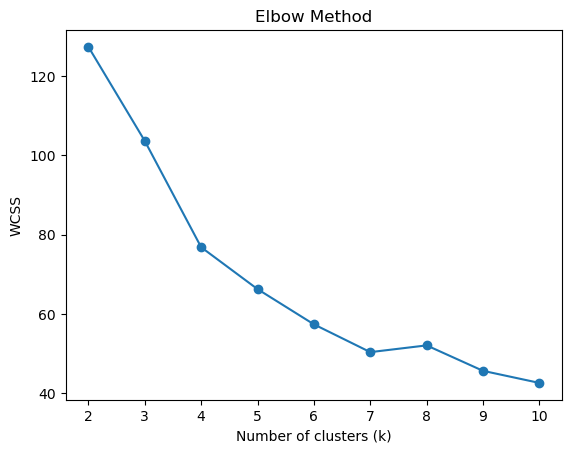

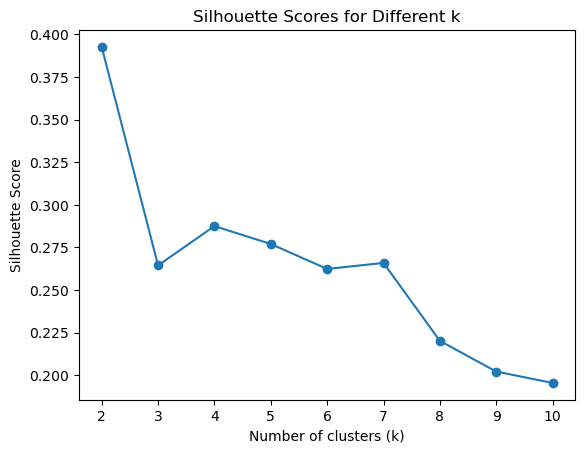

In [200]:
wcss = []
silhouette_scores = []
for k in range(2, 11):  # Testing from 2 to 10 clusters
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=1)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)  # WCSS for elbow method
    silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))

# Plotting the Elbow Method
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Plotting the Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

**K-Means Clustering**

In [162]:
# Run K-Means clustering
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=1)
clusters = kmeans.fit_predict(pca_data)

# Combine player names, clusters, and principal components in a DataFrame
clustered_data = pd.DataFrame({
    'Year': year,
    'Player': player_names,
    'Cluster': clusters
})

# Add principal components to the DataFrame for further analysis
for i in range(pca_data.shape[1]):
    clustered_data[f'PC{i+1}'] = pca_data[:, i]

# Display the DataFrame with names and cluster assignments
print(clustered_data)

      Year             Player  Cluster       PC1       PC2       PC3
965   2008     DeAndre Jordan        0 -3.026371 -0.295177  1.062095
674   2013   Tim Hardaway Jr.        2  1.117073 -0.470262 -0.412376
239   2021      Jason Preston        2  2.022029  0.241713  0.320424
248   2021            JT Thor        1 -0.379501  0.963945  1.779811
819   2011      Isaiah Thomas        2  3.910033 -0.295963 -0.727438
87    2023        Kobe Bufkin        2  1.909033  0.475049  1.595180
245   2021       Jericho Sims        1 -0.584071  3.625088 -0.679369
124   2023      Marcus Sasser        2  0.956226 -2.163612 -1.104218
542   2015       Devin Booker        2  0.438565 -1.091805  0.008099
1026  2007         Al Horford        0 -1.780629 -0.348404 -0.855746
990   2008       Derrick Rose        2  2.360291  1.064804  0.211616
339   2019      Nassir Little        1 -0.137335  0.636424 -0.588990
700   2013      Mason Plumlee        1 -1.617984  0.088844 -0.288489
135   2023      Jarace Walker     

In [163]:
# Identify Players of Clusters
cluster_0 = clustered_data[clustered_data['Cluster'] == 0]
print("Cluster 0 players:", cluster_0['Player'].tolist())
cluster_1 = clustered_data[clustered_data['Cluster'] == 1]
print("Cluster 1 players:", cluster_1['Player'].tolist())
cluster_2 = clustered_data[clustered_data['Cluster'] == 2]
print("Cluster 2 players:", cluster_2['Player'].tolist())


Cluster 0 players: ['DeAndre Jordan', 'Al Horford', 'Nick Richards', 'Moses Brown', 'Bruno Fernando', 'Isaiah Mobley', 'Omer Yurtseven', 'Neemias Queta', 'Tristan Vukcevic']
Cluster 1 players: ['JT Thor', 'Jericho Sims', 'Nassir Little', 'Mason Plumlee', 'Jarace Walker', 'Jimmy Butler', 'Scottie Barnes', 'DeMar DeRozan', 'Zeke Nnaji', 'Udoka Azubuike', 'Jeff Green', 'Jalen Williams', 'James Harden', 'Jalen Wilson', 'Julian Strawther', 'Malcolm Brogdon', 'Daniel Gafford', 'Leonard Miller', 'Jalen Slawson']
Cluster 2 players: ['Tim Hardaway Jr.', 'Jason Preston', 'Isaiah Thomas', 'Kobe Bufkin', 'Marcus Sasser', 'Devin Booker', 'Derrick Rose', 'Klay Thompson', 'Christian Braun', 'Chris Paul', 'Dante Exum', 'Isaiah Wong', 'Joshua Primo', 'Josh Okogie', 'Bradley Beal', 'Jordan Miller', 'Collin Gillespie', 'Dereon Seabron', 'Cason Wallace', 'Andre Jackson Jr.', 'Amari Bailey', 'Cameron Payne']


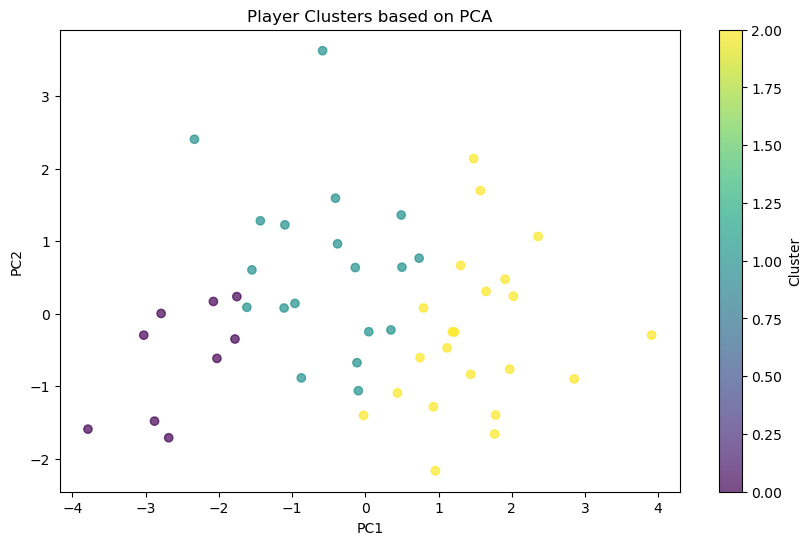

In [400]:
plt.figure(figsize=(10, 6))
plt.scatter(clustered_data['PC1'], clustered_data['PC2'], c=clustered_data['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Player Clusters based on PCA')
plt.colorbar(label='Cluster')
plt.show()

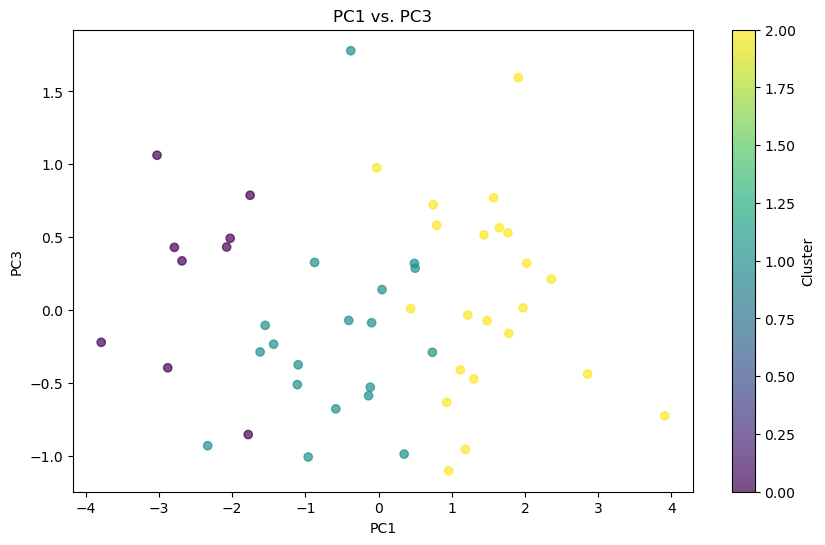

In [401]:
plt.figure(figsize=(10, 6))
plt.scatter(clustered_data['PC1'], clustered_data['PC3'], c=clustered_data['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PC1 vs. PC3')
plt.colorbar(label='Cluster')
plt.show()

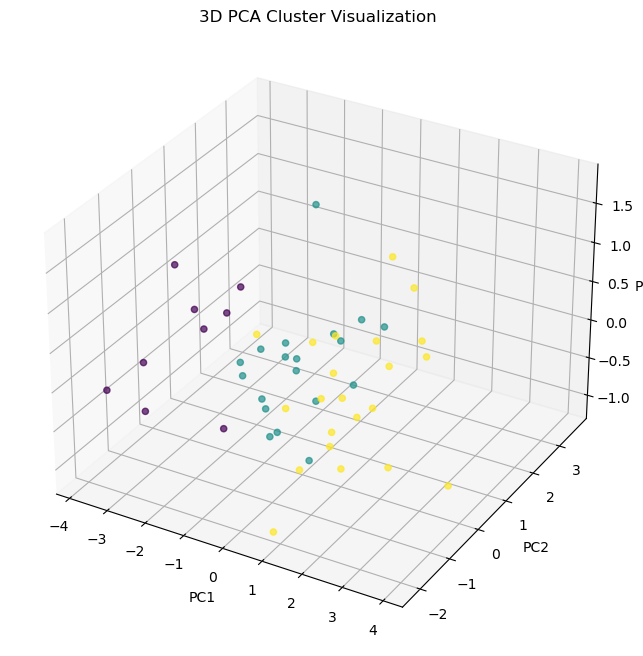

In [402]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clustered_data['PC1'], clustered_data['PC2'], clustered_data['PC3'],
           c=clustered_data['Cluster'], cmap='viridis', alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Cluster Visualization')
plt.show()

**Segment Players based on Years of Experience**

In [169]:
df3['Year'] = df3['Year'].astype(int)
df4['Year'] = df4['Year'].astype(int)

In [ ]:
# Define a function to calculate years of experience
def calculate_experience(draft_year, stat_year):
    return stat_year - draft_year

# Merge clustered_data with df3 (basic stats)
basic_stats_with_experience = pd.merge(
    clustered_data, df3, on='Player', suffixes=('_draft', '_stat'), how='inner'
)

# Calculate experience for basic stats
basic_stats_with_experience['Experience'] = basic_stats_with_experience.apply(
    lambda row: calculate_experience(row['Year_draft'], row['Year_stat']), axis=1
)

# Merge clustered_data with df4 (advanced stats)
advanced_stats_with_experience = pd.merge(
    clustered_data, df4, on='Player', suffixes=('_draft', '_stat'), how='inner'
)

# Calculate experience for advanced stats
advanced_stats_with_experience['Experience'] = advanced_stats_with_experience.apply(
    lambda row: calculate_experience(row['Year_draft'], row['Year_stat']), axis=1
)

# Organize columns for final output
basic_stats_with_experience = basic_stats_with_experience[['Year_stat', 'Player', 'Age', 'Cluster', 'Experience', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'team_retcon']]
advanced_stats_with_experience = advanced_stats_with_experience[['Year_stat', 'Player', 'Age', 'Experience', 'Cluster', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'team_retcon']]

In [243]:
# Define the bins and labels for the experience ranges
bins = [0, 6, 11, 16, float('inf')]
labels = ['0-5', '6-10', '11-15', '15+']

# Add a new column for experience groups
basic_stats_with_experience['Experience Group'] = pd.cut(basic_stats_with_experience['Experience'], bins=bins, labels=labels, right=False)

basic_stats_with_experience = basic_stats_with_experience.sort_values(by=['Cluster', 'Experience Group', 'Experience', 'Year_stat']).reset_index(drop=True)

# Display the DataFrame with the new Experience Group column
basic_stats_with_experience

,Year_stat,Player,Age,Cluster,Experience,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,team_retcon,Experience Group
0,2007,Al Horford,21,0,0,81,77,31.4,4.1,8.2,...,6.6,9.7,1.5,0.7,0.9,1.7,3.3,10.1,ATL,0-5
1,2008,DeAndre Jordan,20,0,0,53,13,14.5,1.8,2.8,...,3.1,4.5,0.2,0.2,1.1,0.8,1.8,4.3,LAC,0-5
2,2019,Moses Brown,20,0,0,9,0,3.7,0.4,1.1,...,1.2,1.6,0.1,0.1,0.1,0.3,0.8,1.2,POR,0-5
3,2019,Bruno Fernando,21,0,0,56,13,12.7,1.8,3.6,...,2.3,3.5,0.9,0.3,0.3,0.8,1.9,4.3,ATL,0-5
4,2021,Neemias Queta,22,0,0,15,0,8.0,1.1,2.5,...,1.1,2.1,0.4,0.1,0.5,0.4,1.2,3.0,SAC,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2021,Derrick Rose,33,2,13,26,4,24.5,4.7,10.5,...,2.2,3.0,4.0,0.8,0.5,1.5,0.6,12.0,NYK,11-15
203,2022,Derrick Rose,34,2,14,27,0,12.5,2.3,5.9,...,1.2,1.5,1.7,0.3,0.2,0.8,0.7,5.6,NYK,11-15
204,2020,Chris Paul,35,2,15,70,70,31.4,6.3,12.6,...,4.1,4.5,8.9,1.4,0.3,2.2,2.4,16.4,PHO,11-15
205,2021,Chris Paul,36,2,16,65,65,32.9,5.6,11.3,...,4.0,4.4,10.8,1.9,0.3,2.4,2.1,14.7,PHO,15+


In [231]:
# Define the bins and labels for the experience ranges
bins = [0, 6, 11, 16, float('inf')]
labels = ['0-5', '6-10', '11-15', '15+']

# Add a new column for experience groups
advanced_stats_with_experience['Experience Group'] = pd.cut(advanced_stats_with_experience['Experience'], bins=bins, labels=labels, right=False)

advanced_stats_with_experience = advanced_stats_with_experience.sort_values(by=['Cluster', 'Experience Group', 'Experience', 'Year_stat']).reset_index(drop=True)

# Display the DataFrame with the new Experience Group column
advanced_stats_with_experience

,Year_stat,Player,Age,Experience,Cluster,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,team_retcon,Experience Group
0,2007,Al Horford,21,0,0,81,2540,14.7,0.539,0.007,...,2.4,3.0,5.5,0.103,-1.2,-0.3,-1.6,0.3,ATL,0-5
1,2008,DeAndre Jordan,20,0,0,53,771,14.1,0.585,0.000,...,0.4,0.9,1.3,0.079,-3.2,-0.1,-3.3,-0.3,LAC,0-5
2,2019,Moses Brown,20,0,0,9,33,6.7,0.407,0.000,...,-0.1,0.0,0.0,-0.065,-8.2,-1.8,-10.0,-0.1,POR,0-5
3,2019,Bruno Fernando,21,0,0,56,713,11.9,0.542,0.186,...,0.4,0.4,0.8,0.055,-3.2,-0.9,-4.1,-0.4,ATL,0-5
4,2021,Neemias Queta,22,0,0,15,120,12.7,0.495,0.000,...,0.0,0.1,0.1,0.051,-4.1,-1.0,-5.1,-0.1,SAC,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2021,Derrick Rose,33,13,2,26,636,16.9,0.541,0.336,...,0.8,0.7,1.4,0.108,2.3,0.0,2.3,0.7,NYK,11-15
203,2022,Derrick Rose,34,14,2,27,338,10.1,0.463,0.396,...,-0.3,0.3,0.0,-0.001,-2.2,-1.5,-3.7,-0.1,NYK,11-15
204,2020,Chris Paul,35,15,2,70,2199,21.4,0.599,0.294,...,6.5,2.7,9.2,0.201,3.5,1.1,4.6,3.6,PHO,11-15
205,2021,Chris Paul,36,16,2,65,2139,20.8,0.581,0.270,...,5.8,3.6,9.4,0.210,3.1,2.3,5.4,4.0,PHO,15+


**Performance Analysis**

Z-score normalization

In [263]:
df3_copy = df3.copy()

# Specify the columns you want to standardize
basic_metrics = ['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
                 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
                 'PF', 'PTS']  

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the specified columns
df3_copy[basic_metrics] = scaler.fit_transform(df3_copy[basic_metrics])

In [264]:
df4_copy = df4.copy()

# Specify the columns you want to standardize
advanced_metrics = ['PER', 'TS%', '3PAr', 'FTr', 'ORB%',
                    'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
                    'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']  

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the specified columns
df4_copy[advanced_metrics] = scaler.fit_transform(df4_copy[advanced_metrics])

In [293]:
df3_copy['Year'] = df3_copy['Year'].astype(int)
df4_copy['Year'] = df4_copy['Year'].astype(int)

# Define a function to calculate years of experience
def calculate_experience(draft_year, stat_year):
    return stat_year - draft_year

# Merge clustered_data with df3 (basic stats)
basic_norm = pd.merge(
    clustered_data, df3_copy, on='Player', suffixes=('_draft', '_stat'), how='inner'
)

# Calculate experience for basic stats
basic_norm['Experience'] = basic_norm.apply(
    lambda row: calculate_experience(row['Year_draft'], row['Year_stat']), axis=1
)

# Merge clustered_data with df4 (advanced stats)
advanced_norm = pd.merge(
    clustered_data, df4_copy, on='Player', suffixes=('_draft', '_stat'), how='inner'
)

# Calculate experience for advanced stats
advanced_norm['Experience'] = advanced_norm.apply(
    lambda row: calculate_experience(row['Year_draft'], row['Year_stat']), axis=1
)

# Organize columns for final output
basic_norm = basic_norm[['Year_stat', 'Player', 'Age', 'Cluster', 'Experience', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'team_retcon']]
advanced_norm = advanced_norm[['Year_stat', 'Player', 'Age', 'Experience', 'Cluster', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'team_retcon']]

In [267]:
# Define the bins and labels for the experience ranges
bins = [0, 6, 11, 16, float('inf')]
labels = ['0-5', '6-10', '11-15', '15+']

# Add a new column for experience groups
basic_norm['Experience Group'] = pd.cut(basic_norm['Experience'], bins=bins, labels=labels, right=False)

basic_norm = basic_norm.sort_values(by=['Cluster', 'Experience Group', 'Experience', 'Year_stat']).reset_index(drop=True)

# Display the DataFrame with the new Experience Group column
basic_norm

,Year_stat,Player,Age,Cluster,Experience,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,team_retcon,Experience Group
0,2007,Al Horford,21,0,0,81,77,31.4,0.508604,0.330011,...,2.230715,2.472491,-0.167297,0.153358,1.049958,0.665150,1.743456,0.348924,ATL,0-5
1,2008,DeAndre Jordan,20,0,0,53,13,14.5,-0.540981,-0.836948,...,0.307904,0.407434,-0.892307,-0.955507,1.467862,-0.448454,-0.019586,-0.618687,LAC,0-5
2,2019,Moses Brown,20,0,0,9,0,3.7,-1.179859,-1.204324,...,-0.735908,-0.744233,-0.948077,-1.177280,-0.621660,-1.067123,-1.194947,-1.135858,POR,0-5
3,2019,Bruno Fernando,21,0,0,56,13,12.7,-0.540981,-0.664066,...,-0.131596,0.010307,-0.501917,-0.733734,-0.203756,-0.448454,0.097950,-0.618687,ATL,0-5
4,2021,Neemias Queta,22,0,0,15,0,8.0,-0.860420,-0.901779,...,-0.790845,-0.545670,-0.780767,-1.177280,0.214149,-0.943389,-0.724803,-0.835565,SAC,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2021,Derrick Rose,33,2,13,26,4,24.5,0.782409,0.827049,...,-0.186533,-0.188256,1.226954,0.375131,0.214149,0.417682,-1.430020,0.665900,NYK,11-15
203,2022,Derrick Rose,34,2,14,27,0,12.5,-0.312810,-0.167027,...,-0.735908,-0.783946,-0.055757,-0.733734,-0.412708,-0.448454,-1.312484,-0.401809,NYK,11-15
204,2020,Chris Paul,35,2,15,70,70,31.4,1.512556,1.280866,...,0.857279,0.407434,3.959684,1.705769,-0.203756,1.283819,0.685630,1.399950,PHO,11-15
205,2021,Chris Paul,36,2,16,65,65,32.9,1.193117,0.999931,...,0.802341,0.367721,5.019314,2.814634,-0.203756,1.531286,0.333022,1.116340,PHO,15+


In [294]:
# Define the bins and labels for the experience ranges
bins = [0, 6, 11, 16, float('inf')]
labels = ['0-5', '6-10', '11-15', '15+']

# Add a new column for experience groups
advanced_norm['Experience Group'] = pd.cut(advanced_norm['Experience'], bins=bins, labels=labels, right=False)

advanced_norm = advanced_norm.sort_values(by=['Cluster', 'Experience Group', 'Experience', 'Year_stat']).reset_index(drop=True)

# Display the DataFrame with the new Experience Group column
advanced_norm

,Year_stat,Player,Age,Experience,Cluster,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,team_retcon,Experience Group
0,2007,Al Horford,21,0,0,81,2540,0.315257,0.254184,-1.083522,...,0.603830,1.577945,1.097403,0.292026,0.051418,-0.056218,0.028461,-0.207067,ATL,0-5
1,2008,DeAndre Jordan,20,0,0,53,771,0.226777,0.689183,-1.115152,...,-0.412515,-0.183880,-0.357497,0.078100,-0.150131,0.043446,-0.134114,-0.676021,LAC,0-5
2,2019,Moses Brown,20,0,0,9,33,-0.864478,-0.994076,-1.115152,...,-0.666601,-0.938947,-0.807823,-1.205456,-0.654003,-0.803696,-0.774853,-0.519703,POR,0-5
3,2019,Bruno Fernando,21,0,0,56,713,-0.097650,0.282553,-0.274703,...,-0.412515,-0.603362,-0.530699,-0.135826,-0.150131,-0.355209,-0.210621,-0.754181,ATL,0-5
4,2021,Neemias Queta,22,0,0,15,120,0.020323,-0.161903,-1.115152,...,-0.615784,-0.855051,-0.773183,-0.171480,-0.240828,-0.405041,-0.306253,-0.519703,SAC,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2021,Derrick Rose,33,13,2,26,636,0.639684,0.273097,0.403077,...,-0.209246,-0.351673,-0.322857,0.336594,0.404129,0.093278,0.401428,0.105570,NYK,11-15
203,2022,Derrick Rose,34,14,2,27,338,-0.363091,-0.464511,0.674190,...,-0.768236,-0.687258,-0.807823,-0.634987,-0.049356,-0.654200,-0.172367,-0.519703,NYK,11-15
204,2020,Chris Paul,35,15,2,70,2199,1.303285,0.821574,0.213299,...,2.687338,1.326256,2.379100,1.165558,0.525059,0.641429,0.621383,2.372185,PHO,11-15
205,2021,Chris Paul,36,16,2,65,2139,1.214804,0.651357,0.104854,...,2.331617,2.081323,2.448381,1.245780,0.484749,1.239411,0.697890,2.684822,PHO,15+


Rank Players based on Advanced Metrics

In [314]:
# Calculate the combined metric temporarily
# combined_metric0 = (advanced_norm['OBPM'] + advanced_norm['DBPM']) / 2

# Use the calculated Series to sort `advanced_norm`
# advanced_norm = advanced_norm.loc[combined_metric0.sort_values(ascending=False).index]

advanced_norm = advanced_norm.sort_values(by=['BPM'], ascending=False)

advanced_norm.head(52)

,Year_stat,Player,Age,Experience,Cluster,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,team_retcon,Experience Group
97,2018,James Harden,29,9,1,78,2867,2.659979,0.982335,1.320341,...,5.177383,2.249116,4.457529,1.637978,1.119628,0.890588,1.233432,6.827256,HOU,6-10
93,2017,James Harden,28,8,1,72,2551,2.542006,1.010704,1.135081,...,5.279018,2.249116,4.526810,1.949954,1.028931,0.790924,1.128236,5.576710,HOU,6-10
102,2019,James Harden,30,10,1,68,2483,2.438779,1.076900,1.401675,...,4.415125,1.745738,3.730079,1.637978,0.988622,0.890588,1.099547,5.264073,HOU,6-10
167,2011,Chris Paul,26,6,2,60,2181,2.129099,0.651357,-0.035221,...,4.669211,0.990670,3.591517,1.851904,0.847537,1.289243,1.061294,4.326163,LAC,6-10
176,2012,Chris Paul,27,7,2,70,2335,2.040619,0.774292,0.109372,...,4.770845,1.913530,4.007203,1.932126,0.817305,1.289243,1.023041,4.560641,LAC,6-10
78,2014,James Harden,25,5,1,81,2981,2.084859,0.878313,0.592856,...,5.583921,2.584702,4.873214,1.736028,0.877770,0.990252,1.023041,5.889346,HOU,0-5
106,2022,Jimmy Butler,33,11,1,64,2138,2.217579,1.275487,-0.591001,...,4.161038,1.494048,3.452955,1.842991,0.847537,1.089916,1.013477,4.091686,MIA,11-15
88,2016,James Harden,27,7,1,81,2947,2.188086,0.953965,1.112488,...,5.228201,2.081323,4.388248,1.557756,0.928157,0.691260,1.013477,5.811187,HOU,6-10
195,2016,Chris Paul,31,11,2,61,1921,2.011125,0.963422,0.624486,...,3.398779,1.242359,2.864067,1.727114,0.807227,1.339075,1.013477,3.622731,LAC,11-15
183,2013,Chris Paul,28,8,2,62,2171,1.966885,0.641900,-0.012628,...,3.957769,1.745738,3.418315,1.780595,0.776995,1.388907,1.003914,4.091686,LAC,6-10


In [296]:
a = advanced_norm[['Year_stat', 'Player', 'Age', 'Cluster', 'Experience', 'Experience Group', 'TS%', 'USG%', 'OBPM', 'DBPM', 'BPM', 'team_retcon']]

a

,Year_stat,Player,Age,Cluster,Experience,Experience Group,TS%,USG%,OBPM,DBPM,BPM,team_retcon
97,2018,James Harden,29,1,9,6-10,0.982335,3.839840,1.119628,0.890588,1.233432,HOU
93,2017,James Harden,28,1,8,6-10,1.010704,3.063961,1.028931,0.790924,1.128236,HOU
102,2019,James Harden,30,1,10,6-10,1.076900,3.099228,0.988622,0.890588,1.099547,HOU
167,2011,Chris Paul,26,2,6,6-10,0.651357,0.983194,0.847537,1.289243,1.061294,LAC
176,2012,Chris Paul,27,2,7,6-10,0.774292,0.683422,0.817305,1.289243,1.023041,LAC
...,...,...,...,...,...,...,...,...,...,...,...,...
178,2018,Isaiah Thomas,29,2,7,6-10,-0.710380,2.058844,-0.230750,-1.152519,-0.440139,DEN
7,2020,Bruno Fernando,22,0,1,0-5,-0.351033,-0.762535,-0.442377,-0.106050,-0.440139,ATL
129,2016,Cameron Payne,22,2,1,0-5,-0.899510,0.912659,-0.452454,-0.654200,-0.554898,CHI
192,2021,Isaiah Thomas,32,2,10,6-10,-0.852228,0.366017,-0.432299,-1.152519,-0.631404,LAL


In [ ]:
advanced_per = advanced_norm.copy()

for stat in advanced_metrics:
    advanced_per[stat] = advanced_per[stat].rank(pct=True) * 100

# Calculate the combined metric temporarily
# combined_metric1 = (advanced_per['OBPM'] + advanced_per['DBPM']) / 2

# Use the calculated Series to sort `advanced_norm`
# advanced_per = advanced_per.loc[combined_metric1.sort_values(ascending=False).index]

advanced_per = advanced_per.sort_values(by=['BPM'], ascending=False)

advanced_per

In [ ]:
advanced_per = advanced_per[['Year_stat', 'Player', 'Age', 'Cluster', 'Experience', 'Experience Group', 'TS%', 'USG%', 'OBPM', 'DBPM', 'BPM', 'team_retcon']]

advanced_per.head(52)

Rank Players based on Advanced Metrics across Clusters

*Cluster 0*

In [328]:
perf0 = advanced_norm[advanced_norm['Player'].isin(cluster_0['Player'])]
perf0

,Year_stat,Player,Age,Experience,Cluster,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,team_retcon,Experience Group
38,2018,Al Horford,32,11,0,68,1973,1.126324,0.878313,0.154558,...,1.670993,1.494048,1.790212,0.987286,0.504904,1.040084,0.669200,2.372185,BOS,11-15
35,2017,Al Horford,31,10,0,72,2277,0.742911,0.594618,0.240410,...,1.416906,2.249116,1.894134,0.844669,0.414207,1.089916,0.602257,2.450344,BOS,6-10
42,2021,Al Horford,35,14,0,69,2005,0.610190,0.585161,0.990487,...,1.264455,2.249116,1.824853,0.987286,0.313432,1.538402,0.592694,2.059548,BOS,11-15
29,2014,Al Horford,28,7,0,76,2318,1.303285,0.481140,-0.947966,...,1.975896,2.081323,2.205898,0.969459,0.434362,0.840756,0.573567,2.372185,ATL,6-10
31,2015,Al Horford,29,8,0,82,2631,1.008351,0.500053,-0.012628,...,1.874262,2.836391,2.448381,0.907064,0.394052,0.890588,0.544877,2.606662,ATL,6-10
16,2010,Al Horford,24,3,0,77,2704,1.200058,0.708096,-1.097078,...,2.636521,2.165220,2.690865,0.969459,0.424284,0.641429,0.525751,2.606662,ATL,0-5
33,2016,Al Horford,30,9,0,68,2193,0.757657,0.386575,0.249447,...,1.213637,1.326256,1.374527,0.604002,0.404129,0.641429,0.506624,1.903230,BOS,6-10
37,2018,DeAndre Jordan,30,10,0,19,493,1.406511,1.597008,-1.115152,...,0.044840,-0.435569,-0.149654,0.987286,0.394052,0.741092,0.506624,0.105570,NYK,6-10
21,2011,Al Horford,25,4,0,11,348,0.949364,0.689183,-1.069966,...,-0.209246,-0.435569,-0.357497,0.978373,0.353742,0.840756,0.506624,-0.050748,ATL,0-5
32,2016,DeAndre Jordan,28,8,0,81,2570,1.362271,1.521356,-1.101596,...,3.043059,2.920287,3.279753,1.343830,0.424284,0.541765,0.497061,2.294026,LAC,6-10


In [346]:
advanced_per0 = perf0.copy()

for stat in advanced_metrics:
    advanced_per0[stat] = advanced_per0[stat].rank(pct=True) * 100

advanced_per0 = advanced_per0[['Year_stat', 'Player', 'Age', 'Cluster', 'Experience', 'Experience Group', 'TS%', 'USG%', 'OBPM', 'DBPM', 'BPM', 'team_retcon']]

advanced_per0 = advanced_per0.sort_values(by=['BPM'], ascending=False)

a0 = advanced_per0.head(round(0.25 * len(advanced_per0) + 0.5))

a0

,Year_stat,Player,Age,Cluster,Experience,Experience Group,TS%,USG%,OBPM,DBPM,BPM,team_retcon
38,2018,Al Horford,32,0,11,11-15,55.555556,71.111111,100.000000,95.555556,100.000000,BOS
35,2017,Al Horford,31,0,10,6-10,37.777778,67.777778,91.111111,97.777778,97.777778,BOS
42,2021,Al Horford,35,0,14,11-15,35.555556,26.666667,66.666667,100.000000,95.555556,BOS
29,2014,Al Horford,28,0,7,6-10,26.666667,93.333333,97.777778,84.444444,93.333333,ATL
31,2015,Al Horford,29,0,8,6-10,30.000000,82.222222,83.333333,90.000000,91.111111,ATL
16,2010,Al Horford,24,0,3,0-5,46.666667,76.666667,94.444444,70.000000,88.888889,ATL
33,2016,Al Horford,30,0,9,6-10,20.000000,76.666667,88.888889,70.000000,84.444444,BOS
37,2018,DeAndre Jordan,30,0,10,6-10,95.555556,55.555556,83.333333,77.777778,84.444444,NYK
21,2011,Al Horford,25,0,4,0-5,41.111111,62.222222,76.666667,84.444444,84.444444,ATL
32,2016,DeAndre Jordan,28,0,8,6-10,91.111111,34.444444,94.444444,58.888889,78.888889,LAC


In [373]:
basic_norm0 = pd.merge(
    basic_norm[['Year_stat', 'Player', 'Age', 'Cluster', 'Experience', 'FGA', '3PA', '2PA', 'FTA', 'DRB', 'STL', 'BLK', 'team_retcon']],
    a0[['Year_stat', 'Player', 'team_retcon']],  # Only use "Year_stat", "Player", and "team_retcon" columns from a0 for matching
    on=['Year_stat', 'Player', 'team_retcon'],
    how='inner'  
)

basic_norm0

,Year_stat,Player,Age,Cluster,Experience,FGA,3PA,2PA,FTA,DRB,STL,BLK,team_retcon
0,2016,DeAndre Jordan,28,0,8,0.092297,-0.911610,0.562180,1.853445,4.153526,-0.068415,2.721576,LAC
1,2018,DeAndre Jordan,30,0,10,-0.037365,-0.911610,0.403745,0.888501,2.999840,-0.290188,1.467862,NYK
2,2016,Al Horford,30,0,9,1.107983,1.016450,0.852645,0.037080,1.571466,0.375131,1.885767,BOS
3,2017,Al Horford,31,0,10,0.827049,0.748664,0.614992,-0.133205,1.846153,-0.068415,1.467862,BOS
4,2018,Al Horford,32,0,11,0.848659,0.695107,0.694210,-0.303489,1.351716,0.596904,1.885767,BOS
5,2021,Al Horford,35,0,14,0.330011,1.123565,-0.150779,-0.303489,1.956028,0.153358,1.885767,BOS
6,2022,Al Horford,36,0,15,0.200348,1.873366,-0.678897,-0.927864,1.351716,-0.290188,1.258910,BOS
7,2010,Al Horford,24,0,3,1.151204,-0.858052,1.829663,0.264125,2.450465,0.375131,1.258910,ATL
8,2011,Al Horford,25,0,4,0.589335,-0.858052,1.143110,0.434410,1.131966,0.596904,1.885767,ATL
9,2013,Al Horford,27,0,6,1.691463,-0.697381,2.410593,0.547932,1.956028,0.596904,2.303672,ATL


In [245]:
anth0 = ran_anth[ran_anth['PLAYER'].isin(cluster_0['Player'])]
anth0 = anth0[['YEAR', 'PLAYER', 'POS', 'HGT', 'WGT', 'WNGSPN', 'LPVERT', 'SPRINT']]
anth0

,YEAR,PLAYER,POS,HGT,WGT,WNGSPN,LPVERT,SPRINT
965,2008,DeAndre Jordan,C,81.75,250.0,90.00,30.5,3.27
1026,2007,Al Horford,PF,80.00,246.0,84.75,35.5,3.37
289,2020,Nick Richards,C,82.50,241.6,86.25,34.0,3.25
311,2019,Moses Brown,C,85.25,237.2,88.75,31.0,3.51
320,2019,Bruno Fernando,C,80.75,237.0,87.25,33.5,3.21
233,2021,Isaiah Mobley,PF,80.00,238.0,87.00,32.0,3.30
488,2017,Omer Yurtseven,C,82.50,248.4,85.00,31.5,3.45
242,2021,Neemias Queta,C,83.25,248.4,88.00,33.0,3.29
134,2023,Tristan Vukcevic,C,83.30,223.4,86.50,30.5,3.43


*Cluster 1*

In [398]:
perf1 = advanced_norm[advanced_norm['Player'].isin(cluster_1['Player'])]
perf1

,Year_stat,Player,Age,Experience,Cluster,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,team_retcon,Experience Group
97,2018,James Harden,29,9,1,78,2867,2.659979,0.982335,1.320341,...,5.177383,2.249116,4.457529,1.637978,1.119628,0.890588,1.233432,6.827256,HOU,6-10
93,2017,James Harden,28,8,1,72,2551,2.542006,1.010704,1.135081,...,5.279018,2.249116,4.526810,1.949954,1.028931,0.790924,1.128236,5.576710,HOU,6-10
102,2019,James Harden,30,10,1,68,2483,2.438779,1.076900,1.401675,...,4.415125,1.745738,3.730079,1.637978,0.988622,0.890588,1.099547,5.264073,HOU,6-10
78,2014,James Harden,25,5,1,81,2981,2.084859,0.878313,0.592856,...,5.583921,2.584702,4.873214,1.736028,0.877770,0.990252,1.023041,5.889346,HOU,0-5
106,2022,Jimmy Butler,33,11,1,64,2138,2.217579,1.275487,-0.591001,...,4.161038,1.494048,3.452955,1.842991,0.847537,1.089916,1.013477,4.091686,MIA,11-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,2019,Nassir Little,19,0,1,48,573,-0.436824,-0.067338,0.651597,...,-0.463332,-0.687258,-0.599980,-0.207135,-0.119898,-0.205713,-0.153241,-0.597862,POR,0-5
95,2016,Jeff Green,30,9,1,69,1534,-0.304104,-0.067338,0.448263,...,-0.717418,-0.183880,-0.565340,-0.429974,-0.069511,-0.504705,-0.162804,-0.910499,ORL,6-10
64,2022,Zeke Nnaji,22,2,1,53,728,-0.009170,1.020161,0.385003,...,-0.158429,-0.351673,-0.253576,0.318767,-0.099743,-0.355209,-0.172367,-0.676021,DEN,0-5
51,2020,Udoka Azubuike,21,0,1,15,57,-0.333597,0.802661,-1.115152,...,-0.615784,-0.855051,-0.773183,0.434644,-0.381912,0.940420,-0.181931,-0.441544,UTA,0-5


In [369]:
advanced_per1 = perf1.copy()

for stat in advanced_metrics:
    advanced_per1[stat] = advanced_per1[stat].rank(pct=True) * 100

advanced_per1 = advanced_per1[['Year_stat', 'Player', 'Age', 'Cluster', 'Experience', 'Experience Group', 'TS%', 'USG%', 'OBPM', 'DBPM', 'BPM', 'team_retcon']]

advanced_per1 = advanced_per1.sort_values(by=['BPM'], ascending=False)

a1 = advanced_per1.head(round(0.25 * len(advanced_per1) + 0.5))

a1

,Year_stat,Player,Age,Cluster,Experience,Experience Group,TS%,USG%,OBPM,DBPM,BPM,team_retcon
97,2018,James Harden,29,1,9,6-10,77.142857,100.000000,100.000000,81.428571,100.000000,HOU
93,2017,James Harden,28,1,8,6-10,80.000000,97.142857,98.571429,73.571429,98.571429,HOU
102,2019,James Harden,30,1,10,6-10,82.857143,98.571429,97.142857,81.428571,97.142857,HOU
78,2014,James Harden,25,1,5,0-5,64.285714,91.428571,94.285714,90.000000,95.714286,HOU
106,2022,Jimmy Butler,33,1,11,11-15,88.571429,74.285714,92.857143,94.285714,93.571429,MIA
88,2016,James Harden,27,1,7,6-10,70.000000,95.714286,95.714286,69.285714,93.571429,HOU
98,2020,Jimmy Butler,31,1,9,6-10,66.428571,82.857143,86.428571,98.571429,91.428571,MIA
79,2016,Jimmy Butler,27,1,5,0-5,43.571429,80.714286,90.000000,87.142857,90.000000,CHI
89,2018,Jimmy Butler,29,1,7,6-10,38.571429,60.000000,80.000000,97.142857,88.571429,MIN
83,2015,James Harden,26,1,6,6-10,57.142857,94.285714,91.428571,45.000000,87.142857,HOU


In [374]:
basic_norm1 = pd.merge(
    basic_norm[['Year_stat', 'Player', 'Age', 'Cluster', 'Experience', 'FGA', '3PA', '2PA', 'FTA', 'DRB', 'STL', 'BLK', 'team_retcon']],
    a1[['Year_stat', 'Player', 'team_retcon']],  # Only use "Year_stat", "Player", and "team_retcon" columns from a1 for matching
    on=['Year_stat', 'Player', 'team_retcon'],
    how='inner'  
)

basic_norm1

,Year_stat,Player,Age,Cluster,Experience,FGA,3PA,2PA,FTA,DRB,STL,BLK,team_retcon
0,2017,Jimmy Butler,28,1,6,1.929176,0.909336,1.908881,2.988673,0.802341,3.036407,0.005197,MIN
1,2018,Jimmy Butler,29,1,7,1.950787,1.498465,1.644822,2.364297,0.582591,3.923498,1.258910,MIN
2,2019,Jimmy Butler,30,1,8,1.388918,0.213092,1.592010,4.067139,1.241841,2.592861,0.423101,MIA
3,2020,Jimmy Butler,31,1,9,1.626631,0.159535,1.908881,3.442764,1.406653,3.258180,-0.203756,MIA
4,2021,Jimmy Butler,32,1,10,1.691463,0.159535,1.988098,3.442764,0.857279,2.149315,0.214149,MIA
5,2022,Jimmy Butler,33,1,11,1.561800,-0.054694,1.935287,3.840094,0.637529,2.592861,-0.203756,MIA
6,2014,Jimmy Butler,25,1,3,1.583411,0.695107,1.618416,2.931911,0.857279,2.592861,0.423101,CHI
7,2016,Jimmy Butler,27,1,5,2.123670,0.855779,2.172940,3.953617,1.077028,2.814634,0.005197,CHI
8,2012,James Harden,23,1,3,2.253332,2.408938,1.565604,4.691515,0.857279,2.592861,0.214149,HOU
9,2013,James Harden,24,1,4,2.123670,2.623167,1.301545,4.067139,0.747404,2.149315,0.005197,HOU


In [399]:
# Group by 'Player' and calculate the average BPM
average_bpm = perf1.groupby('Player')['BPM'].mean().reset_index()

# Rename the column for clarity
average_bpm = average_bpm.rename(columns={'BPM': 'Average BPM'})

# Display the result
average_bpm

,Player,Average BPM
0,Daniel Gafford,0.133657
1,DeMar DeRozan,0.384214
2,James Harden,0.876983
3,Jeff Green,0.014116
4,Jericho Sims,0.076277
5,Jimmy Butler,0.637567
6,Malcolm Brogdon,0.312627
7,Mason Plumlee,0.329704
8,Nassir Little,-0.071953
9,Udoka Azubuike,-0.003416


In [229]:
anth1 = ran_anth[ran_anth['PLAYER'].isin(cluster_1['Player'])]
anth1 = anth1[['YEAR', 'PLAYER', 'POS', 'HGT', 'WGT', 'WNGSPN', 'LPVERT', 'SPRINT']]
anth1

,YEAR,PLAYER,POS,HGT,WGT,WNGSPN,LPVERT,SPRINT
248,2021,JT Thor,PF,80.50,203.0,87.25,35.0,3.06
245,2021,Jericho Sims,C,81.00,250.2,87.25,44.5,3.05
339,2019,Nassir Little,SF,76.50,224.2,85.25,38.5,3.24
700,2013,Mason Plumlee,C-PF,83.25,238.2,83.00,36.0,3.29
135,2023,Jarace Walker,PF,78.50,248.6,86.50,38.0,3.20
778,2011,Jimmy Butler,SF,78.00,222.2,79.50,39.0,3.15
200,2021,Scottie Barnes,SF,79.00,225.4,86.75,39.5,3.15
895,2009,DeMar DeRozan,SG-SF,77.50,211.2,81.00,38.5,3.31
282,2020,Zeke Nnaji,PF-C,81.25,246.8,86.00,38.0,3.20
260,2020,Udoka Azubuike,C,82.00,259.5,91.25,41.0,3.23


In [395]:
traits = ['HGT', 'WGT', 'WNGSPN', 'LPVERT', 'SPRINT']

for trait in traits:
    anth1[trait] = pd.to_numeric(anth1[trait], errors='coerce')

cluster1_means = anth1[traits].mean()

cluster1_means

HGT        79.015789
WGT       227.500000
WNGSPN     84.623684
LPVERT     37.578947
SPRINT      3.218421
dtype: float64

In [ ]:
reg1 = pd.merge(
    advanced_norm[['Year_stat', 'Player', 'Age', 'Cluster', 'Experience', 'FGA', '3PA', '2PA', 'FTA', 'DRB', 'STL', 'BLK', 'team_retcon']],
    a0[['Year_stat', 'Player', 'team_retcon']],  # Only use "Year_stat", "Player", and "team_retcon" columns from a0 for matching
    on=['Year_stat', 'Player', 'team_retcon'],
    how='inner'  
)

basic_norm0

*Cluster 2*

In [339]:
perf2 = advanced_norm[advanced_norm['Player'].isin(cluster_2['Player'])]
perf2

,Year_stat,Player,Age,Experience,Cluster,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,team_retcon,Experience Group
167,2011,Chris Paul,26,6,2,60,2181,2.129099,0.651357,-0.035221,...,4.669211,0.990670,3.591517,1.851904,0.847537,1.289243,1.061294,4.326163,LAC,6-10
176,2012,Chris Paul,27,7,2,70,2335,2.040619,0.774292,0.109372,...,4.770845,1.913530,4.007203,1.932126,0.817305,1.289243,1.023041,4.560641,LAC,6-10
195,2016,Chris Paul,31,11,2,61,1921,2.011125,0.963422,0.624486,...,3.398779,1.242359,2.864067,1.727114,0.807227,1.339075,1.013477,3.622731,LAC,11-15
183,2013,Chris Paul,28,8,2,62,2171,1.966885,0.641900,-0.012628,...,3.957769,1.745738,3.418315,1.780595,0.776995,1.388907,1.003914,4.091686,LAC,6-10
186,2014,Chris Paul,29,9,2,82,2857,1.981632,0.793205,0.231373,...,5.939642,1.745738,4.769293,1.780595,0.817305,0.890588,0.946534,5.185914,LAC,6-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2019,Dante Exum,24,5,2,11,83,-1.144665,-0.086251,0.064187,...,-0.717418,-0.855051,-0.842464,-1.125234,-0.351680,-0.155882,-0.363633,-0.519703,UTA,0-5
132,2022,Joshua Primo,20,1,2,4,93,-0.952958,-0.426685,0.972413,...,-0.717418,-0.938947,-0.842464,-1.276765,-0.301292,-0.704032,-0.421012,-0.519703,SAS,0-5
178,2018,Isaiah Thomas,29,7,2,12,181,-0.820238,-0.710380,0.845894,...,-0.819053,-0.855051,-0.911745,-1.312420,-0.230750,-1.152519,-0.440139,-0.597862,DEN,6-10
129,2016,Cameron Payne,22,1,2,11,142,-1.262638,-0.899510,1.324859,...,-0.819053,-0.855051,-0.911745,-1.392642,-0.452454,-0.654200,-0.554898,-0.597862,CHI,0-5


In [353]:
advanced_per2 = perf2.copy()

for stat in advanced_metrics:
    advanced_per2[stat] = advanced_per2[stat].rank(pct=True) * 100

advanced_per2 = advanced_per2[['Year_stat', 'Player', 'Age', 'Cluster', 'Experience', 'Experience Group', 'TS%', 'USG%', 'OBPM', 'DBPM', 'BPM', 'team_retcon']]

advanced_per2 = advanced_per2.sort_values(by=['BPM'], ascending=False)

a2 = advanced_per2.head(round(0.25 * len(advanced_per2)))

a2

,Year_stat,Player,Age,Cluster,Experience,Experience Group,TS%,USG%,OBPM,DBPM,BPM,team_retcon
167,2011,Chris Paul,26,2,6,6-10,78.260870,54.891304,98.913043,97.282609,100.000000,LAC
176,2012,Chris Paul,27,2,7,6-10,86.956522,38.586957,97.282609,97.282609,98.913043,LAC
195,2016,Chris Paul,31,2,11,11-15,97.826087,56.521739,95.108696,98.913043,97.826087,LAC
183,2013,Chris Paul,28,2,8,6-10,76.086957,47.826087,91.847826,100.000000,96.739130,LAC
186,2014,Chris Paul,29,2,9,6-10,88.586957,47.826087,97.282609,91.847826,95.652174,LAC
190,2015,Chris Paul,30,2,10,6-10,70.652174,72.826087,90.217391,94.565217,94.565217,LAC
198,2017,Chris Paul,32,2,12,11-15,95.652174,57.608696,89.130435,93.478261,93.478261,HOU
133,2010,Derrick Rose,22,2,2,0-5,48.913043,96.739130,95.108696,82.608696,92.391304,CHI
159,2016,Isaiah Thomas,27,2,5,0-5,100.000000,100.000000,100.000000,45.652174,91.304348,BOS
141,2011,Derrick Rose,23,2,3,0-5,40.760870,88.043478,93.478261,76.630435,90.217391,CHI


In [376]:
basic_norm2 = pd.merge(
    basic_norm[['Year_stat', 'Player', 'Age', 'Cluster', 'Experience', 'FGA', '3PA', '2PA', 'FTA', 'DRB', 'STL', 'BLK', 'team_retcon']],
    a2[['Year_stat', 'Player', 'team_retcon']],  # Only use "Year_stat", "Player", and "team_retcon" columns from a2 for matching
    on=['Year_stat', 'Player', 'team_retcon'],
    how='inner'  
)

basic_norm2

,Year_stat,Player,Age,Cluster,Experience,FGA,3PA,2PA,FTA,DRB,STL,BLK,team_retcon
0,2013,Isaiah Thomas,24,2,2,1.842735,1.819809,1.380763,2.137252,-0.131596,1.483996,-0.621660,SAC
1,2014,Isaiah Thomas,25,2,3,1.496969,2.623167,0.535774,2.591343,-0.406283,-0.068415,-0.830613,BOS
2,2015,Isaiah Thomas,26,2,4,2.210111,2.141152,1.644822,2.648104,-0.076658,1.040450,-0.621660,BOS
3,2016,Isaiah Thomas,27,2,5,2.750370,3.640754,1.565604,3.726571,-0.241471,0.596904,-0.412708,BOS
4,2014,Isaiah Thomas,25,2,3,0.956711,1.498465,0.430151,1.512876,-0.406283,0.818677,-0.621660,PHO
5,2021,Devin Booker,25,2,6,3.074525,2.837396,2.357781,1.910206,1.022091,1.040450,0.005197,PHO
6,2022,Devin Booker,26,2,7,2.901642,2.301824,2.436999,2.761627,0.637529,0.818677,-0.203756,PHO
7,2010,Derrick Rose,22,2,2,2.815201,1.659137,2.648246,2.818388,0.307904,0.818677,0.423101,CHI
8,2011,Derrick Rose,23,2,3,2.404604,1.444908,2.225752,2.364297,0.088154,0.596904,0.632053,CHI
9,2020,Derrick Rose,32,2,12,1.194425,0.480878,1.222328,0.150602,-0.021721,0.596904,0.005197,NYK


In [230]:
anth2 = ran_anth[ran_anth['PLAYER'].isin(cluster_2['Player'])]
anth2 = anth2[['YEAR', 'PLAYER', 'POS', 'HGT', 'WGT', 'WNGSPN', 'LPVERT', 'SPRINT']]
anth2

,YEAR,PLAYER,POS,HGT,WGT,WNGSPN,LPVERT,SPRINT
674,2013,Tim Hardaway Jr.,SG,76.50,199.4,79.00,37.5,3.25
239,2021,Jason Preston,PG,75.00,180.6,80.50,38.5,3.13
819,2011,Isaiah Thomas,PG,68.75,186.0,73.75,40.0,3.14
87,2023,Kobe Bufkin,SG,76.30,186.8,79.80,36.0,3.00
124,2023,Marcus Sasser,PG,73.30,195.6,79.00,35.0,3.43
542,2015,Devin Booker,SG,76.50,205.8,80.25,34.5,3.28
990,2008,Derrick Rose,PG,73.50,196.0,80.00,40.0,3.05
822,2011,Klay Thompson,SG,77.75,205.6,81.00,31.5,3.24
148,2022,Christian Braun,SG,77.50,209.2,78.50,40.0,3.16
1207,2005,Chris Paul,PG,71.75,178.0,76.25,38.0,3.22


**Comparative Analysis**

In [377]:
stats_cols = ['Age', 'Experience', 'FGA', '3PA', '2PA', 'FTA', 'DRB', 'STL', 'BLK']

*Cluster 0*

In [ ]:
avg_stats0 = basic_norm0[stats_cols].mean()

std_stats0 = basic_norm0[stats_cols].std()

In [381]:
print(avg_stats0)

print(std_stats0)

Age           29.583333
Experience     8.750000
FGA            0.785629
3PA            0.110441
2PA            0.903256
FTA            0.178983
DRB            1.997231
STL            0.245764
BLK            1.850942
dtype: float64
Age           3.604501
Experience    3.596084
FGA           0.553300
3PA           1.013468
2PA           0.875311
FTA           0.707088
DRB           0.851128
STL           0.346915
BLK           0.444000
dtype: float64


*Cluster 1*

In [382]:
avg_stats1 = basic_norm1[stats_cols].mean()

std_stats1 = basic_norm1[stats_cols].std()

In [383]:
print(avg_stats1)

print(std_stats1)

Age           28.388889
Experience     7.500000
FGA            2.232922
3PA            2.382159
2PA            1.556802
FTA            3.956770
DRB            1.196060
STL            2.494295
BLK            0.376667
dtype: float64
Age           3.031965
Experience    2.895229
FGA           0.672008
3PA           1.956230
2PA           0.407873
FTA           0.956654
DRB           0.474184
STL           0.734444
BLK           0.408931
dtype: float64


*Cluster 2*

In [384]:
avg_stats2 = basic_norm2[stats_cols].mean()

std_stats2 = basic_norm2[stats_cols].std()

In [385]:
print(avg_stats2)

print(std_stats2)

Age           28.217391
Experience     7.782609
FGA            1.706496
3PA            1.717351
2PA            1.241845
FTA            1.540023
DRB            0.372396
STL            1.821476
BLK           -0.258265
dtype: float64
Age           4.274199
Experience    4.670571
FGA           0.748333
3PA           0.832515
2PA           0.737744
FTA           1.023119
DRB           0.492116
STL           1.333775
BLK           0.428305
dtype: float64


In [388]:
# Convert pca_data to a DataFrame and add cluster labels
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = clusters  # cluster_labels should be a list or array of same length

# Calculate the average scores for each principal component by cluster
cluster_averages = pca_df.groupby('Cluster').mean()

cluster_averages

,PC1,PC2,PC3
Cluster,,,
0,-2.534123,-0.625502,0.229315
1,-0.556603,0.648500,-0.202705
2,1.517389,-0.304181,0.081253


**Regression Analysis**